<a href="https://colab.research.google.com/github/mostafa-ja/Data-Mining-fall-2023/blob/main/data_mining4_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install xgboost
!pip install seaborn

# Download data

In [3]:
import gdown

file_id = '1quMzXrCUCVTHaVTAT26jO-T_HnhSBxtp'

download_link = f'https://drive.google.com/uc?id={file_id}'
output = 'EX_2.zip'
gdown.download(download_link, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1quMzXrCUCVTHaVTAT26jO-T_HnhSBxtp
To: /content/EX_2.zip
100%|██████████| 125M/125M [00:02<00:00, 46.6MB/s]


'EX_2.zip'

In [4]:
!unzip '/content/EX_2.zip' -d "/content/data/"

Archive:  /content/EX_2.zip
  inflating: /content/data/Answer.rar  
  inflating: /content/data/Q_A.rar   
  inflating: /content/data/Questions.rar  
  inflating: /content/data/U.rar     
  inflating: /content/data/tags.rar  
  inflating: /content/data/user_badge.rar  


In [5]:
!unrar x "/content/data/*.rar"


UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from /content/data/Questions.rar

Extracting  Questions.txt                                                  3%  6% 10%  OK 

Extracting from /content/data/user_badge.rar

Extracting  user_badge.txt                                                13% 16% 20% 23% 26% 30% 33% 36% 40% 43% 47% 50% 53% 57% 60%  OK 

Extracting from /content/data/Q_A.rar

Extracting  Q_A.csv                                                       63% 67% 70% 71%  OK 

Extracting from /content/data/U.rar

Extracting  U.csv                                                         74%  OK 

Extracting from /content/data/Answer.rar

Extracting  Answer.csv                                                    77% 80% 84% 87% 90%  OK 

Extracting from /content/data/tags.rar

Extracting  tags.txt      

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Load datasets

In [7]:
answers = pd.read_csv('/content/Answer.csv', encoding="utf-16")
answers = answers.drop(0) # remove the meaningless row(the second line)
answers.head(10)

,Id,CreationDate,Score,OwnerUserId,CommentCount,ClosedDate
1,127,2008-08-01 16:13:47.600000000,37.0,35.0,2.0,NaN
2,128,2008-08-01 16:19:04.283000000,7.0,26.0,2.0,NaN
3,133,2008-08-01 16:31:43.430000000,0.0,59.0,1.0,NaN
4,139,2008-08-01 16:43:30.880000000,5.0,72.0,0.0,NaN
5,142,2008-08-01 16:56:55.830000000,2.0,42.0,0.0,NaN
6,143,2008-08-01 17:01:27.240000000,3.0,86.0,0.0,NaN
7,169,2008-08-01 18:23:59.040000000,30.0,93.0,0.0,NaN
8,183,2008-08-01 18:51:12.090000000,35.0,86.0,0.0,NaN
9,186,2008-08-01 19:07:59.480000000,2.0,40.0,0.0,NaN
10,190,2008-08-01 19:21:57.517000000,4.0,55.0,0.0,NaN


In [8]:
len(answers['ClosedDate'].dropna())

0

In [9]:
questions = pd.read_csv('/content/Questions.txt', encoding="utf-16")
questions.head(3)

,Id,CreationDate,Score,ViewCount,OwnerUserId,CommentCount,ClosedDate,FavoriteCount
0,123,2008-08-01 16:08:52,48,44161,78.0,3,NaN,13
1,126,2008-08-01 16:10:30,33,6357,58.0,0,2012-05-08 18:11:27,2
2,382,2008-08-02 08:58:28,28,6827,122.0,1,NaN,4


In [10]:
Q_A = pd.read_csv('/content/Q_A.csv', encoding="utf-16")
Q_A.head(3)

,QId,AId,accepted
0,898405,1153025,0
1,12679343,12679433,0
2,19108614,19786664,0


In [11]:
Q_A[Q_A['accepted']==1]

,QId,AId,accepted
7,9371288,9371326,1
8,23613344,23613857,1
9,24660822,24702541,1
10,6859287,6860105,1
18,13988691,13990370,1
...,...,...,...
1597492,14586647,14612066,1
1597498,16558302,16558462,1
1597504,14422160,14422297,1
1597506,25098589,25098679,1


In [12]:
users = pd.read_csv('/content/U.csv', encoding="utf-16")
users.head(3)

,Id,Reputation,Views,UpVotes,DownVotes
0,1,33107,173080,3225,1299
1,3,10145,18988,5654,100
2,9,8716,3152,42,4


In [13]:
user_badge = pd.read_csv('/content/user_badge.txt', encoding="utf-16")
user_badge.head(10)

,UserId,Name
0,3718,Teacher
1,994,Teacher
2,3893,Teacher
3,4591,Teacher
4,5196,Teacher
5,2635,Teacher
6,1113,Teacher
7,4182,Teacher
8,164,Teacher
9,652,Teacher


In [14]:
tags = pd.read_csv('/content/tags.txt', sep='\t')
tags.head(10)

,Id,Tags
0,2288942,user-interface
1,4433442,canvas
2,6381190,shortcut
3,27466868,jboss7.x
4,8375328,math
5,9530883,cdi
6,14851537,jdbc
7,16153458,eclipse
8,4400311,go
9,7001897,viewflipper


In [15]:
len(questions)

810071

In [16]:
len(answers)

1510812

In [17]:
merged_A_Q = pd.merge(answers, Q_A, left_on='Id', right_on='AId', how='inner')
merged_A_Q = pd.merge(merged_A_Q, questions, left_on='QId', right_on='Id', how='inner',suffixes=('_A', '_Q'))
merged_A_Q.head()

,Id_A,CreationDate_A,Score_A,OwnerUserId_A,CommentCount_A,ClosedDate_A,QId,AId,accepted,Id_Q,CreationDate_Q,Score_Q,ViewCount,OwnerUserId_Q,CommentCount_Q,ClosedDate_Q,FavoriteCount
0,127,2008-08-01 16:13:47.600000000,37.0,35.0,2.0,NaN,126,127,1,126,2008-08-01 16:10:30,33,6357,58.0,0,2012-05-08 18:11:27,2
1,128,2008-08-01 16:19:04.283000000,7.0,26.0,2.0,NaN,126,128,0,126,2008-08-01 16:10:30,33,6357,58.0,0,2012-05-08 18:11:27,2
2,139,2008-08-01 16:43:30.880000000,5.0,72.0,0.0,NaN,126,139,0,126,2008-08-01 16:10:30,33,6357,58.0,0,2012-05-08 18:11:27,2
3,142,2008-08-01 16:56:55.830000000,2.0,42.0,0.0,NaN,126,142,0,126,2008-08-01 16:10:30,33,6357,58.0,0,2012-05-08 18:11:27,2
4,143,2008-08-01 17:01:27.240000000,3.0,86.0,0.0,NaN,126,143,0,126,2008-08-01 16:10:30,33,6357,58.0,0,2012-05-08 18:11:27,2


In [18]:
len(merged_A_Q)

1510812

In [19]:
merged_A_Q_U = pd.merge(merged_A_Q, users,  left_on='OwnerUserId_A', right_on='Id', how='inner')
merged_A_Q_U.head()

,Id_A,CreationDate_A,Score_A,OwnerUserId_A,CommentCount_A,ClosedDate_A,QId,AId,accepted,Id_Q,...,ViewCount,OwnerUserId_Q,CommentCount_Q,ClosedDate_Q,FavoriteCount,Id,Reputation,Views,UpVotes,DownVotes
0,127,2008-08-01 16:13:47.600000000,37.0,35.0,2.0,NaN,126,127,1,126,...,6357,58.0,0,2012-05-08 18:11:27,2,35,11543,1060,436,208
1,3886,2008-08-06 19:29:24.427000000,133.0,35.0,1.0,NaN,3881,3886,1,3881,...,61344,122.0,3,NaN,72,35,11543,1060,436,208
2,11567,2008-08-14 19:26:35.570000000,1.0,35.0,0.0,NaN,11561,11567,0,11561,...,16785,1310.0,0,NaN,4,35,11543,1060,436,208
3,19904,2008-08-21 13:37:58.600000000,135.0,35.0,0.0,NaN,19893,19904,1,19893,...,49130,1288.0,1,NaN,18,35,11543,1060,436,208
4,26311,2008-08-25 16:01:58.660000000,20.0,35.0,7.0,NaN,26305,26311,0,26305,...,155132,2644.0,1,NaN,43,35,11543,1060,436,208


In [20]:
len(merged_A_Q_U)

1503487

In [21]:
merged_A_Q_U2 = pd.merge(merged_A_Q, users,  left_on='OwnerUserId_A', right_on='Id', how='left')
merged_A_Q_U2.head()

,Id_A,CreationDate_A,Score_A,OwnerUserId_A,CommentCount_A,ClosedDate_A,QId,AId,accepted,Id_Q,...,ViewCount,OwnerUserId_Q,CommentCount_Q,ClosedDate_Q,FavoriteCount,Id,Reputation,Views,UpVotes,DownVotes
0,127,2008-08-01 16:13:47.600000000,37.0,35.0,2.0,NaN,126,127,1,126,...,6357,58.0,0,2012-05-08 18:11:27,2,35.0,11543.0,1060.0,436.0,208.0
1,128,2008-08-01 16:19:04.283000000,7.0,26.0,2.0,NaN,126,128,0,126,...,6357,58.0,0,2012-05-08 18:11:27,2,26.0,8520.0,2843.0,564.0,67.0
2,139,2008-08-01 16:43:30.880000000,5.0,72.0,0.0,NaN,126,139,0,126,...,6357,58.0,0,2012-05-08 18:11:27,2,72.0,18882.0,1118.0,1168.0,21.0
3,142,2008-08-01 16:56:55.830000000,2.0,42.0,0.0,NaN,126,142,0,126,...,6357,58.0,0,2012-05-08 18:11:27,2,42.0,13820.0,754.0,359.0,45.0
4,143,2008-08-01 17:01:27.240000000,3.0,86.0,0.0,NaN,126,143,0,126,...,6357,58.0,0,2012-05-08 18:11:27,2,86.0,3578.0,366.0,1641.0,59.0


In [22]:
len(merged_A_Q_U2)

1510812

In [23]:
merged_A_Q_U2[merged_A_Q_U2['Id'].isnull()]

,Id_A,CreationDate_A,Score_A,OwnerUserId_A,CommentCount_A,ClosedDate_A,QId,AId,accepted,Id_Q,...,ViewCount,OwnerUserId_Q,CommentCount_Q,ClosedDate_Q,FavoriteCount,Id,Reputation,Views,UpVotes,DownVotes
12,62045,2008-09-15 09:46:13.973000000,2.0,NaN,0.0,NaN,126,62045,0,126,...,6357,58.0,0,2012-05-08 18:11:27,2,NaN,NaN,NaN,NaN,NaN
57,2216,2008-08-05 12:50:59.020000000,1.0,NaN,0.0,NaN,2092,2216,0,2092,...,1411,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
59,9086,2008-08-12 17:58:25.630000000,0.0,NaN,0.0,NaN,2092,9086,0,2092,...,1411,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
64,2977,2008-08-06 00:16:25.020000000,5.0,NaN,0.0,NaN,2968,2977,0,2968,...,42848,362.0,1,2014-05-13 17:04:49,3,NaN,NaN,NaN,NaN,NaN
98,45518,2008-09-05 10:34:05.583000000,1.0,NaN,1.0,NaN,3881,45518,0,3881,...,61344,122.0,3,NaN,72,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1502341,28739905,2015-02-26 10:26:40.583000000,0.0,NaN,0.0,NaN,28739520,28739905,0,28739520,...,22,3693338.0,3,NaN,0,NaN,NaN,NaN,NaN,NaN
1503357,28764091,2015-02-27 11:29:49.967000000,1.0,NaN,0.0,NaN,28763403,28764091,0,28763403,...,41,2816909.0,7,NaN,0,NaN,NaN,NaN,NaN,NaN
1504171,28781215,2015-02-28 11:32:52.213000000,1.0,NaN,0.0,NaN,28781162,28781215,0,28781162,...,39,3787809.0,2,NaN,0,NaN,NaN,NaN,NaN,NaN
1504180,28781360,2015-02-28 11:48:42.503000000,-1.0,NaN,2.0,NaN,28781218,28781360,0,28781218,...,29,1941853.0,5,NaN,0,NaN,NaN,NaN,NaN,NaN


In [24]:
badge_count = user_badge.groupby('UserId').size().reset_index(name='badgeCount')
badge_count

,UserId,badgeCount
0,1,298
1,2,72
2,3,109
3,4,165
4,5,284
...,...,...
2094762,4645953,1
2094763,4645962,1
2094764,4645964,1
2094765,4645973,1


In [25]:
merged_A_Q_U_B = pd.merge(merged_A_Q_U, badge_count, left_on='Id', right_on='UserId', how='inner')
merged_A_Q_U_B.head()

,Id_A,CreationDate_A,Score_A,OwnerUserId_A,CommentCount_A,ClosedDate_A,QId,AId,accepted,Id_Q,...,CommentCount_Q,ClosedDate_Q,FavoriteCount,Id,Reputation,Views,UpVotes,DownVotes,UserId,badgeCount
0,127,2008-08-01 16:13:47.600000000,37.0,35.0,2.0,NaN,126,127,1,126,...,0,2012-05-08 18:11:27,2,35,11543,1060,436,208,35,113
1,3886,2008-08-06 19:29:24.427000000,133.0,35.0,1.0,NaN,3881,3886,1,3881,...,3,NaN,72,35,11543,1060,436,208,35,113
2,11567,2008-08-14 19:26:35.570000000,1.0,35.0,0.0,NaN,11561,11567,0,11561,...,0,NaN,4,35,11543,1060,436,208,35,113
3,19904,2008-08-21 13:37:58.600000000,135.0,35.0,0.0,NaN,19893,19904,1,19893,...,1,NaN,18,35,11543,1060,436,208,35,113
4,26311,2008-08-25 16:01:58.660000000,20.0,35.0,7.0,NaN,26305,26311,0,26305,...,1,NaN,43,35,11543,1060,436,208,35,113


In [26]:
len(merged_A_Q_U_B)

1488203

In [27]:
merged_A_Q_U_B['ClosedDate_Q']

0          2012-05-08 18:11:27
1                          NaN
2                          NaN
3                          NaN
4                          NaN
                  ...         
1488198                    NaN
1488199                    NaN
1488200                    NaN
1488201                    NaN
1488202                    NaN
Name: ClosedDate_Q, Length: 1488203, dtype: object

In [28]:
merged_A_Q_U_B['Closed_Q'] = merged_A_Q_U_B['ClosedDate_Q'].notnull().astype(int)

In [29]:
merged_A_Q_U_B['Closed_Q']

0          1
1          0
2          0
3          0
4          0
          ..
1488198    0
1488199    0
1488200    0
1488201    0
1488202    0
Name: Closed_Q, Length: 1488203, dtype: int64

In [30]:
merged_A_Q_U_B.columns

Index(['Id_A', 'CreationDate_A', 'Score_A', 'OwnerUserId_A', 'CommentCount_A',
       'ClosedDate_A', 'QId', 'AId', 'accepted', 'Id_Q', 'CreationDate_Q',
       'Score_Q', 'ViewCount', 'OwnerUserId_Q', 'CommentCount_Q',
       'ClosedDate_Q', 'FavoriteCount', 'Id', 'Reputation', 'Views', 'UpVotes',
       'DownVotes', 'UserId', 'badgeCount', 'Closed_Q'],
      dtype='object')

In [31]:
merged_A_Q_U_B['CreationDate_A'] = pd.to_datetime(merged_A_Q_U_B['CreationDate_A'])
merged_A_Q_U_B['CreationDate_Q'] = pd.to_datetime(merged_A_Q_U_B['CreationDate_Q'])
merged_A_Q_U_B['timeDiffrence(Hours)'] = (merged_A_Q_U_B['CreationDate_A'] - merged_A_Q_U_B['CreationDate_Q']).dt.total_seconds() / 60 / 60 #based on hours
merged_A_Q_U_B['timeDiffrence(Hours)']

0          0.054889
1          0.048174
2          0.044603
3          0.036556
4          0.031850
             ...   
1488198    0.166627
1488199    0.549986
1488200    1.734582
1488201    0.309215
1488202    0.069180
Name: timeDiffrence(Hours), Length: 1488203, dtype: float64

In [32]:
merged_A_Q_U_B[merged_A_Q_U_B['timeDiffrence(Hours)']==0]

,Id_A,CreationDate_A,Score_A,OwnerUserId_A,CommentCount_A,ClosedDate_A,QId,AId,accepted,Id_Q,...,FavoriteCount,Id,Reputation,Views,UpVotes,DownVotes,UserId,badgeCount,Closed_Q,timeDiffrence(Hours)
205237,14554596,2013-01-28 02:23:27,5.0,8123.0,1.0,NaN,14554595,14554596,1,14554595,...,1,8123,35143,2161,1937,192,8123,237,0,0.0
220013,20799711,2013-12-27 11:14:49,9.0,418556.0,5.0,NaN,20799710,20799711,1,20799710,...,0,418556,117299,25726,12690,4280,418556,295,0,0.0
1097537,11641986,2012-07-25 02:46:34,5.0,1339751.0,4.0,NaN,11641985,11641986,0,11641985,...,6,1339751,370,46,15,0,1339751,20,0,0.0
1109418,12644018,2012-09-28 16:38:24,1.0,902217.0,0.0,NaN,12644017,12644018,1,12644017,...,0,902217,1281,665,2082,39,902217,65,0,0.0
1142057,12683022,2012-10-02 00:33:43,4.0,650558.0,0.0,NaN,12683020,12683022,1,12683020,...,0,650558,1665,190,389,8,650558,81,0,0.0
1322645,19215085,2013-10-06 23:18:43,0.0,1478808.0,0.0,NaN,19215084,19215085,1,19215084,...,1,1478808,372,50,39,0,1478808,17,0,0.0


In [33]:
merged_A_Q_U_B[merged_A_Q_U_B['timeDiffrence(Hours)']<0]

,Id_A,CreationDate_A,Score_A,OwnerUserId_A,CommentCount_A,ClosedDate_A,QId,AId,accepted,Id_Q,...,FavoriteCount,Id,Reputation,Views,UpVotes,DownVotes,UserId,badgeCount,Closed_Q,timeDiffrence(Hours)
55,58612,2008-09-12 10:19:01.440,2.0,518.0,0.0,NaN,462923,58612,0,462923,...,26,518,2418,357,113,4,518,56,1,-3129.968767
5322,57134,2008-09-11 17:26:52.853,7.0,4926.0,0.0,NaN,462923,57134,0,462923,...,26,4926,39308,5729,981,176,4926,197,1,-3146.837819
7007,22253141,2014-03-07 14:42:57.793,0.0,2736496.0,4.0,NaN,22253140,22253141,0,22253140,...,0,2736496,7775,856,724,598,2736496,72,0,-0.000058
7134,23259195,2014-04-24 03:18:32.743,0.0,2736496.0,13.0,NaN,23259194,23259195,0,23259194,...,0,2736496,7775,856,724,598,2736496,72,0,-0.000071
7137,24516963,2014-07-01 18:24:20.787,1.0,2736496.0,0.0,NaN,24516962,24516963,0,24516962,...,0,2736496,7775,856,724,598,2736496,72,0,-0.000059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1479990,28115735,2015-01-23 17:48:22.877,0.0,246568.0,0.0,NaN,28115734,28115735,0,28115734,...,0,246568,10067,992,724,5,246568,315,0,-0.000034
1480059,28121620,2015-01-24 02:16:17.947,0.0,1696177.0,0.0,NaN,28121619,28121620,0,28121619,...,0,1696177,22,13,0,0,1696177,6,0,-0.000015
1480934,28204737,2015-01-28 23:59:56.603,0.0,69173.0,0.0,NaN,28204736,28204737,0,28204736,...,0,69173,1225,176,3723,18,69173,33,0,-0.000110
1481100,28572784,2015-02-17 22:57:04.803,0.0,373418.0,6.0,NaN,28572783,28572784,1,28572783,...,0,373418,970,150,121,10,373418,19,0,-0.000055


In [34]:
len(merged_A_Q_U_B)

1488203

In [35]:
merged_A_Q_U_B2 = merged_A_Q_U_B[merged_A_Q_U_B['timeDiffrence(Hours)']>0]

In [36]:
len(merged_A_Q_U_B2)

1487610

In [37]:
merged_A_Q_U_B2.columns

Index(['Id_A', 'CreationDate_A', 'Score_A', 'OwnerUserId_A', 'CommentCount_A',
       'ClosedDate_A', 'QId', 'AId', 'accepted', 'Id_Q', 'CreationDate_Q',
       'Score_Q', 'ViewCount', 'OwnerUserId_Q', 'CommentCount_Q',
       'ClosedDate_Q', 'FavoriteCount', 'Id', 'Reputation', 'Views', 'UpVotes',
       'DownVotes', 'UserId', 'badgeCount', 'Closed_Q',
       'timeDiffrence(Hours)'],
      dtype='object')

In [55]:
df_answers = merged_A_Q_U_B2.groupby('OwnerUserId_A').size().reset_index(name='#answers_A')
df_answers

,OwnerUserId_A,#answers_A
0,1.0,2
1,3.0,1
2,9.0,1
3,13.0,441
4,17.0,9
...,...,...
192146,4644935.0,3
192147,4645046.0,1
192148,4645110.0,4
192149,4645296.0,1


In [58]:
sum(df_answers['#answers_A'].isnull())

0

In [59]:
df_answers_mean = merged_A_Q_U_B2.groupby('OwnerUserId_A')['accepted'].mean().reset_index(name='accepted_ratio_A')
df_answers_mean

,OwnerUserId_A,accepted_ratio_A
0,1.0,0.000000
1,3.0,0.000000
2,9.0,0.000000
3,13.0,0.444444
4,17.0,0.111111
...,...,...
192146,4644935.0,0.333333
192147,4645046.0,0.000000
192148,4645110.0,0.250000
192149,4645296.0,0.000000


In [60]:
merged_df = pd.merge(df_answers, df_answers_mean,  left_on='OwnerUserId_A', right_on='OwnerUserId_A', how='left')
merged_df

,OwnerUserId_A,#answers_A,accepted_ratio_A
0,1.0,2,0.000000
1,3.0,1,0.000000
2,9.0,1,0.000000
3,13.0,441,0.444444
4,17.0,9,0.111111
...,...,...,...
192146,4644935.0,3,0.333333
192147,4645046.0,1,0.000000
192148,4645110.0,4,0.250000
192149,4645296.0,1,0.000000


In [62]:
merged_A_Q_U_B2.columns

Index(['Id_A', 'CreationDate_A', 'Score_A', 'OwnerUserId_A', 'CommentCount_A',
       'ClosedDate_A', 'QId', 'AId', 'accepted', 'Id_Q', 'CreationDate_Q',
       'Score_Q', 'ViewCount', 'OwnerUserId_Q', 'CommentCount_Q',
       'ClosedDate_Q', 'FavoriteCount', 'Id', 'Reputation', 'Views', 'UpVotes',
       'DownVotes', 'UserId', 'badgeCount', 'Closed_Q',
       'timeDiffrence(Hours)'],
      dtype='object')

In [61]:
len(merged_A_Q_U_B2)

1487610

In [63]:
merged_A_Q_U_B2_R = pd.merge(merged_A_Q_U_B2, merged_df,  left_on='OwnerUserId_A', right_on='OwnerUserId_A', how='inner')
merged_A_Q_U_B2_R

,Id_A,CreationDate_A,Score_A,OwnerUserId_A,CommentCount_A,ClosedDate_A,QId,AId,accepted,Id_Q,...,Reputation,Views,UpVotes,DownVotes,UserId,badgeCount,Closed_Q,timeDiffrence(Hours),#answers_A,accepted_ratio_A
0,127,2008-08-01 16:13:47.600,37.0,35.0,2.0,NaN,126,127,1,126,...,11543,1060,436,208,35,113,1,0.054889,5,0.6
1,3886,2008-08-06 19:29:24.427,133.0,35.0,1.0,NaN,3881,3886,1,3881,...,11543,1060,436,208,35,113,0,0.048174,5,0.6
2,11567,2008-08-14 19:26:35.570,1.0,35.0,0.0,NaN,11561,11567,0,11561,...,11543,1060,436,208,35,113,0,0.044603,5,0.6
3,19904,2008-08-21 13:37:58.600,135.0,35.0,0.0,NaN,19893,19904,1,19893,...,11543,1060,436,208,35,113,0,0.036556,5,0.6
4,26311,2008-08-25 16:01:58.660,20.0,35.0,7.0,NaN,26305,26311,0,26305,...,11543,1060,436,208,35,113,0,0.031850,5,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1487605,28922535,2015-03-08 02:48:19.857,0.0,4645692.0,2.0,NaN,28922468,28922535,0,28922468,...,1,1,0,0,4645692,3,0,0.166627,1,0.0
1487606,28922813,2015-03-08 03:40:11.950,0.0,3313892.0,0.0,NaN,28922649,28922813,0,28922649,...,1,0,0,0,3313892,1,0,0.549986,1,0.0
1487607,28922747,2015-03-08 03:24:05.497,0.0,4643110.0,2.0,NaN,28922175,28922747,0,28922175,...,1,0,0,0,4643110,2,0,1.734582,2,0.0
1487608,28922923,2015-03-08 04:00:36.173,0.0,4643110.0,0.0,NaN,28922819,28922923,0,28922819,...,1,0,0,0,4643110,2,0,0.309215,2,0.0


In [66]:
# Function to calculate the new column to exclude the current smaple from accepted_ratio_A

def calculate_value(row):
  if  row['#answers_A'] < 2 :
    return np.nan
  else :
    if row['accepted'] == 1:
        return ((row['accepted_ratio_A'] * row['#answers_A']) - 1) / (row['#answers_A'] - 1)
    else:
        return (row['accepted_ratio_A'] * row['#answers_A']) / (row['#answers_A'] - 1)

# Apply the function to create the new column 'new_column'
merged_A_Q_U_B2_R['corrected_accepted_ratio_A'] = merged_A_Q_U_B2_R.apply(lambda row: calculate_value(row), axis=1)

In [67]:
merged_A_Q_U_B2_R

,Id_A,CreationDate_A,Score_A,OwnerUserId_A,CommentCount_A,ClosedDate_A,QId,AId,accepted,Id_Q,...,Views,UpVotes,DownVotes,UserId,badgeCount,Closed_Q,timeDiffrence(Hours),#answers_A,accepted_ratio_A,corrected_accepted_ratio_A
0,127,2008-08-01 16:13:47.600,37.0,35.0,2.0,NaN,126,127,1,126,...,1060,436,208,35,113,1,0.054889,5,0.6,0.50
1,3886,2008-08-06 19:29:24.427,133.0,35.0,1.0,NaN,3881,3886,1,3881,...,1060,436,208,35,113,0,0.048174,5,0.6,0.50
2,11567,2008-08-14 19:26:35.570,1.0,35.0,0.0,NaN,11561,11567,0,11561,...,1060,436,208,35,113,0,0.044603,5,0.6,0.75
3,19904,2008-08-21 13:37:58.600,135.0,35.0,0.0,NaN,19893,19904,1,19893,...,1060,436,208,35,113,0,0.036556,5,0.6,0.50
4,26311,2008-08-25 16:01:58.660,20.0,35.0,7.0,NaN,26305,26311,0,26305,...,1060,436,208,35,113,0,0.031850,5,0.6,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1487605,28922535,2015-03-08 02:48:19.857,0.0,4645692.0,2.0,NaN,28922468,28922535,0,28922468,...,1,0,0,4645692,3,0,0.166627,1,0.0,NaN
1487606,28922813,2015-03-08 03:40:11.950,0.0,3313892.0,0.0,NaN,28922649,28922813,0,28922649,...,0,0,0,3313892,1,0,0.549986,1,0.0,NaN
1487607,28922747,2015-03-08 03:24:05.497,0.0,4643110.0,2.0,NaN,28922175,28922747,0,28922175,...,0,0,0,4643110,2,0,1.734582,2,0.0,0.00
1487608,28922923,2015-03-08 04:00:36.173,0.0,4643110.0,0.0,NaN,28922819,28922923,0,28922819,...,0,0,0,4643110,2,0,0.309215,2,0.0,0.00


In [68]:
mean_value  = merged_A_Q_U_B2_R['corrected_accepted_ratio_A'].mean()

0.3092488049037868

In [69]:
# Fill null values in 'corrected_accepted_ratio_A' with mean

mean_value  = merged_A_Q_U_B2_R['corrected_accepted_ratio_A'].mean()
merged_A_Q_U_B2_R['corrected_accepted_ratio_A'].fillna(round(mean_value, 2), inplace=True)
merged_A_Q_U_B2_R

,Id_A,CreationDate_A,Score_A,OwnerUserId_A,CommentCount_A,ClosedDate_A,QId,AId,accepted,Id_Q,...,Views,UpVotes,DownVotes,UserId,badgeCount,Closed_Q,timeDiffrence(Hours),#answers_A,accepted_ratio_A,corrected_accepted_ratio_A
0,127,2008-08-01 16:13:47.600,37.0,35.0,2.0,NaN,126,127,1,126,...,1060,436,208,35,113,1,0.054889,5,0.6,0.50
1,3886,2008-08-06 19:29:24.427,133.0,35.0,1.0,NaN,3881,3886,1,3881,...,1060,436,208,35,113,0,0.048174,5,0.6,0.50
2,11567,2008-08-14 19:26:35.570,1.0,35.0,0.0,NaN,11561,11567,0,11561,...,1060,436,208,35,113,0,0.044603,5,0.6,0.75
3,19904,2008-08-21 13:37:58.600,135.0,35.0,0.0,NaN,19893,19904,1,19893,...,1060,436,208,35,113,0,0.036556,5,0.6,0.50
4,26311,2008-08-25 16:01:58.660,20.0,35.0,7.0,NaN,26305,26311,0,26305,...,1060,436,208,35,113,0,0.031850,5,0.6,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1487605,28922535,2015-03-08 02:48:19.857,0.0,4645692.0,2.0,NaN,28922468,28922535,0,28922468,...,1,0,0,4645692,3,0,0.166627,1,0.0,0.31
1487606,28922813,2015-03-08 03:40:11.950,0.0,3313892.0,0.0,NaN,28922649,28922813,0,28922649,...,0,0,0,3313892,1,0,0.549986,1,0.0,0.31
1487607,28922747,2015-03-08 03:24:05.497,0.0,4643110.0,2.0,NaN,28922175,28922747,0,28922175,...,0,0,0,4643110,2,0,1.734582,2,0.0,0.00
1487608,28922923,2015-03-08 04:00:36.173,0.0,4643110.0,0.0,NaN,28922819,28922923,0,28922819,...,0,0,0,4643110,2,0,0.309215,2,0.0,0.00


In [75]:
df = merged_A_Q_U_B2_R.groupby('QId').size().reset_index(name='#answers_Q')
df

,QId,#answers_Q
0,123,17
1,126,18
2,382,1
3,564,15
4,2092,3
...,...,...
717670,28922732,1
717671,28922734,1
717672,28922819,5
717673,28922872,2


In [71]:
merged_A_Q_U_B2_R2 = pd.merge(merged_A_Q_U_B2_R, df,  left_on='QId', right_on='QId', how='left')
merged_A_Q_U_B2_R2

,Id_A,CreationDate_A,Score_A,OwnerUserId_A,CommentCount_A,ClosedDate_A,QId,AId,accepted,Id_Q,...,UpVotes,DownVotes,UserId,badgeCount,Closed_Q,timeDiffrence(Hours),#answers_A,accepted_ratio_A,corrected_accepted_ratio_A,#answers_Q
0,127,2008-08-01 16:13:47.600,37.0,35.0,2.0,NaN,126,127,1,126,...,436,208,35,113,1,0.054889,5,0.6,0.50,18
1,3886,2008-08-06 19:29:24.427,133.0,35.0,1.0,NaN,3881,3886,1,3881,...,436,208,35,113,0,0.048174,5,0.6,0.50,21
2,11567,2008-08-14 19:26:35.570,1.0,35.0,0.0,NaN,11561,11567,0,11561,...,436,208,35,113,0,0.044603,5,0.6,0.75,4
3,19904,2008-08-21 13:37:58.600,135.0,35.0,0.0,NaN,19893,19904,1,19893,...,436,208,35,113,0,0.036556,5,0.6,0.50,13
4,26311,2008-08-25 16:01:58.660,20.0,35.0,7.0,NaN,26305,26311,0,26305,...,436,208,35,113,0,0.031850,5,0.6,0.75,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1487605,28922535,2015-03-08 02:48:19.857,0.0,4645692.0,2.0,NaN,28922468,28922535,0,28922468,...,0,0,4645692,3,0,0.166627,1,0.0,0.31,2
1487606,28922813,2015-03-08 03:40:11.950,0.0,3313892.0,0.0,NaN,28922649,28922813,0,28922649,...,0,0,3313892,1,0,0.549986,1,0.0,0.31,2
1487607,28922747,2015-03-08 03:24:05.497,0.0,4643110.0,2.0,NaN,28922175,28922747,0,28922175,...,0,0,4643110,2,0,1.734582,2,0.0,0.00,1
1487608,28922923,2015-03-08 04:00:36.173,0.0,4643110.0,0.0,NaN,28922819,28922923,0,28922819,...,0,0,4643110,2,0,0.309215,2,0.0,0.00,5


In [79]:
# Grouping the DataFrame by 'QId'
grouped = merged_A_Q_U_B2_R.groupby('QId')

result_dict = {}
# Iterating through each group
for qid, group in grouped:
    for index, row in group.iterrows():
      current_id = row['Id_A']
      current_time_diff = row['timeDiffrence(Hours)']

      # Counting the number of other Id_A with less time difference for the current Id_A
      count = sum(group['timeDiffrence(Hours)'] < current_time_diff)

      # Storing the count for the current Id_A
      result_dict[current_id] = count


In [80]:
len(result_dict)

1487610

In [81]:
result_df = pd.DataFrame(list(result_dict.items()), columns=['Id_A', 'Less_Time_Diff_Count'])
result_df

,Id_A,Less_Time_Diff_Count
0,183,1
1,133,0
2,190,2
3,540,3
4,939,4
...,...,...
1487605,28922923,4
1487606,28922833,0
1487607,28922940,1
1487608,28922900,0


In [82]:
merged_A_Q_U_B2_R2.columns

Index(['Id_A', 'CreationDate_A', 'Score_A', 'OwnerUserId_A', 'CommentCount_A',
       'ClosedDate_A', 'QId', 'AId', 'accepted', 'Id_Q', 'CreationDate_Q',
       'Score_Q', 'ViewCount', 'OwnerUserId_Q', 'CommentCount_Q',
       'ClosedDate_Q', 'FavoriteCount', 'Id', 'Reputation', 'Views', 'UpVotes',
       'DownVotes', 'UserId', 'badgeCount', 'Closed_Q', 'timeDiffrence(Hours)',
       '#answers_A', 'accepted_ratio_A', 'corrected_accepted_ratio_A',
       '#answers_Q'],
      dtype='object')

In [83]:
merged_A_Q_U_B2_R3 = pd.merge(merged_A_Q_U_B2_R2, result_df,  left_on='Id_A', right_on='Id_A', how='inner')
merged_A_Q_U_B2_R3

,Id_A,CreationDate_A,Score_A,OwnerUserId_A,CommentCount_A,ClosedDate_A,QId,AId,accepted,Id_Q,...,DownVotes,UserId,badgeCount,Closed_Q,timeDiffrence(Hours),#answers_A,accepted_ratio_A,corrected_accepted_ratio_A,#answers_Q,Less_Time_Diff_Count
0,127,2008-08-01 16:13:47.600,37.0,35.0,2.0,NaN,126,127,1,126,...,208,35,113,1,0.054889,5,0.6,0.50,18,0
1,3886,2008-08-06 19:29:24.427,133.0,35.0,1.0,NaN,3881,3886,1,3881,...,208,35,113,0,0.048174,5,0.6,0.50,21,0
2,11567,2008-08-14 19:26:35.570,1.0,35.0,0.0,NaN,11561,11567,0,11561,...,208,35,113,0,0.044603,5,0.6,0.75,4,0
3,19904,2008-08-21 13:37:58.600,135.0,35.0,0.0,NaN,19893,19904,1,19893,...,208,35,113,0,0.036556,5,0.6,0.50,13,2
4,26311,2008-08-25 16:01:58.660,20.0,35.0,7.0,NaN,26305,26311,0,26305,...,208,35,113,0,0.031850,5,0.6,0.75,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1487605,28922535,2015-03-08 02:48:19.857,0.0,4645692.0,2.0,NaN,28922468,28922535,0,28922468,...,0,4645692,3,0,0.166627,1,0.0,0.31,2,0
1487606,28922813,2015-03-08 03:40:11.950,0.0,3313892.0,0.0,NaN,28922649,28922813,0,28922649,...,0,3313892,1,0,0.549986,1,0.0,0.31,2,1
1487607,28922747,2015-03-08 03:24:05.497,0.0,4643110.0,2.0,NaN,28922175,28922747,0,28922175,...,0,4643110,2,0,1.734582,2,0.0,0.00,1,0
1487608,28922923,2015-03-08 04:00:36.173,0.0,4643110.0,0.0,NaN,28922819,28922923,0,28922819,...,0,4643110,2,0,0.309215,2,0.0,0.00,5,4


In [84]:
df_Q = merged_A_Q_U_B2_R3.groupby('OwnerUserId_Q').size().reset_index(name='#answers_Q_U')
df_Q

,OwnerUserId_Q,#answers_Q_U
0,13.0,4
1,22.0,17
2,25.0,15
3,27.0,7
4,40.0,3
...,...,...
243101,4645615.0,1
243102,4645687.0,1
243103,4645700.0,2
243104,4645731.0,1


In [85]:
df_Q_mean = merged_A_Q_U_B2_R3.groupby('OwnerUserId_Q')['accepted'].mean().reset_index(name='accepted_ratio_Q')
df_Q_mean

,OwnerUserId_Q,accepted_ratio_Q
0,13.0,0.500000
1,22.0,0.294118
2,25.0,0.066667
3,27.0,0.142857
4,40.0,0.333333
...,...,...
243101,4645615.0,0.000000
243102,4645687.0,0.000000
243103,4645700.0,0.000000
243104,4645731.0,0.000000


In [86]:
merged_df = pd.merge(df_Q, df_Q_mean,  left_on='OwnerUserId_Q', right_on='OwnerUserId_Q', how='left')
merged_df

,OwnerUserId_Q,#answers_Q_U,accepted_ratio_Q
0,13.0,4,0.500000
1,22.0,17,0.294118
2,25.0,15,0.066667
3,27.0,7,0.142857
4,40.0,3,0.333333
...,...,...,...
243101,4645615.0,1,0.000000
243102,4645687.0,1,0.000000
243103,4645700.0,2,0.000000
243104,4645731.0,1,0.000000


In [87]:
merged_A_Q_U_B2_R4 = pd.merge(merged_A_Q_U_B2_R3, merged_df,  left_on='OwnerUserId_Q', right_on='OwnerUserId_Q', how='inner')
merged_A_Q_U_B2_R4

,Id_A,CreationDate_A,Score_A,OwnerUserId_A,CommentCount_A,ClosedDate_A,QId,AId,accepted,Id_Q,...,badgeCount,Closed_Q,timeDiffrence(Hours),#answers_A,accepted_ratio_A,corrected_accepted_ratio_A,#answers_Q,Less_Time_Diff_Count,#answers_Q_U,accepted_ratio_Q
0,127,2008-08-01 16:13:47.600,37.0,35.0,2.0,NaN,126,127,1,126,...,113,1,0.054889,5,0.600000,0.50,18,0,40,0.2
1,128,2008-08-01 16:19:04.283,7.0,26.0,2.0,NaN,126,128,0,126,...,212,1,0.142856,4,0.000000,0.00,18,1,40,0.2
2,139,2008-08-01 16:43:30.880,5.0,72.0,0.0,NaN,126,139,0,126,...,160,1,0.550244,3,0.000000,0.00,18,2,40,0.2
3,142,2008-08-01 16:56:55.830,2.0,42.0,0.0,NaN,126,142,0,126,...,92,1,0.773842,2,0.000000,0.00,18,3,40,0.2
4,143,2008-08-01 17:01:27.240,3.0,86.0,0.0,NaN,126,143,0,126,...,73,1,0.849233,26,0.192308,0.20,18,4,40,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1464091,28918051,2015-03-07 17:51:24.177,2.0,4638142.0,4.0,NaN,28917880,28918051,1,28917880,...,4,0,0.256716,1,1.000000,0.31,1,0,1,1.0
1464092,28919123,2015-03-07 19:39:56.343,0.0,3718088.0,0.0,NaN,28797939,28919123,0,28797939,...,5,0,144.329540,1,0.000000,0.31,1,0,1,0.0
1464093,28920032,2015-03-07 21:10:08.197,1.0,2641836.0,0.0,NaN,27829303,28920032,0,27829303,...,4,0,1415.272277,1,0.000000,0.31,1,0,1,0.0
1464094,28922084,2015-03-08 01:24:30.083,1.0,4645110.0,1.0,NaN,28921975,28922084,1,28921975,...,3,0,0.270579,4,0.250000,0.00,1,0,1,1.0


In [88]:
# Function to calculate the new column to exclude the current smaple from accepted_ratio_A

def calculate_value(row):
  if  row['#answers_Q_U'] < 2 :
    return np.nan
  else :
    if row['accepted'] == 1:
        return ((row['accepted_ratio_Q'] * row['#answers_Q_U']) - 1) / (row['#answers_Q_U'] - 1)
    else:
        return (row['accepted_ratio_Q'] * row['#answers_Q_U']) / (row['#answers_Q_U'] - 1)

# Apply the function to create the new column 'new_column'
merged_A_Q_U_B2_R4['corrected_accepted_ratio_Q'] = merged_A_Q_U_B2_R4.apply(lambda row: calculate_value(row), axis=1)

In [89]:
merged_A_Q_U_B2_R4

,Id_A,CreationDate_A,Score_A,OwnerUserId_A,CommentCount_A,ClosedDate_A,QId,AId,accepted,Id_Q,...,Closed_Q,timeDiffrence(Hours),#answers_A,accepted_ratio_A,corrected_accepted_ratio_A,#answers_Q,Less_Time_Diff_Count,#answers_Q_U,accepted_ratio_Q,corrected_accepted_ratio_Q
0,127,2008-08-01 16:13:47.600,37.0,35.0,2.0,NaN,126,127,1,126,...,1,0.054889,5,0.600000,0.50,18,0,40,0.2,0.179487
1,128,2008-08-01 16:19:04.283,7.0,26.0,2.0,NaN,126,128,0,126,...,1,0.142856,4,0.000000,0.00,18,1,40,0.2,0.205128
2,139,2008-08-01 16:43:30.880,5.0,72.0,0.0,NaN,126,139,0,126,...,1,0.550244,3,0.000000,0.00,18,2,40,0.2,0.205128
3,142,2008-08-01 16:56:55.830,2.0,42.0,0.0,NaN,126,142,0,126,...,1,0.773842,2,0.000000,0.00,18,3,40,0.2,0.205128
4,143,2008-08-01 17:01:27.240,3.0,86.0,0.0,NaN,126,143,0,126,...,1,0.849233,26,0.192308,0.20,18,4,40,0.2,0.205128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1464091,28918051,2015-03-07 17:51:24.177,2.0,4638142.0,4.0,NaN,28917880,28918051,1,28917880,...,0,0.256716,1,1.000000,0.31,1,0,1,1.0,NaN
1464092,28919123,2015-03-07 19:39:56.343,0.0,3718088.0,0.0,NaN,28797939,28919123,0,28797939,...,0,144.329540,1,0.000000,0.31,1,0,1,0.0,NaN
1464093,28920032,2015-03-07 21:10:08.197,1.0,2641836.0,0.0,NaN,27829303,28920032,0,27829303,...,0,1415.272277,1,0.000000,0.31,1,0,1,0.0,NaN
1464094,28922084,2015-03-08 01:24:30.083,1.0,4645110.0,1.0,NaN,28921975,28922084,1,28921975,...,0,0.270579,4,0.250000,0.00,1,0,1,1.0,NaN


In [92]:
mean_value  = merged_A_Q_U_B2_R4['corrected_accepted_ratio_Q'].mean()
mean_value

0.2982647312744519

In [91]:
# Fill null values in 'corrected_accepted_ratio_A' with mean

mean_value  = merged_A_Q_U_B2_R4['corrected_accepted_ratio_Q'].mean()
merged_A_Q_U_B2_R4['corrected_accepted_ratio_Q'].fillna(round(mean_value, 2), inplace=True)
merged_A_Q_U_B2_R4

,Id_A,CreationDate_A,Score_A,OwnerUserId_A,CommentCount_A,ClosedDate_A,QId,AId,accepted,Id_Q,...,Closed_Q,timeDiffrence(Hours),#answers_A,accepted_ratio_A,corrected_accepted_ratio_A,#answers_Q,Less_Time_Diff_Count,#answers_Q_U,accepted_ratio_Q,corrected_accepted_ratio_Q
0,127,2008-08-01 16:13:47.600,37.0,35.0,2.0,NaN,126,127,1,126,...,1,0.054889,5,0.600000,0.50,18,0,40,0.2,0.179487
1,128,2008-08-01 16:19:04.283,7.0,26.0,2.0,NaN,126,128,0,126,...,1,0.142856,4,0.000000,0.00,18,1,40,0.2,0.205128
2,139,2008-08-01 16:43:30.880,5.0,72.0,0.0,NaN,126,139,0,126,...,1,0.550244,3,0.000000,0.00,18,2,40,0.2,0.205128
3,142,2008-08-01 16:56:55.830,2.0,42.0,0.0,NaN,126,142,0,126,...,1,0.773842,2,0.000000,0.00,18,3,40,0.2,0.205128
4,143,2008-08-01 17:01:27.240,3.0,86.0,0.0,NaN,126,143,0,126,...,1,0.849233,26,0.192308,0.20,18,4,40,0.2,0.205128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1464091,28918051,2015-03-07 17:51:24.177,2.0,4638142.0,4.0,NaN,28917880,28918051,1,28917880,...,0,0.256716,1,1.000000,0.31,1,0,1,1.0,0.300000
1464092,28919123,2015-03-07 19:39:56.343,0.0,3718088.0,0.0,NaN,28797939,28919123,0,28797939,...,0,144.329540,1,0.000000,0.31,1,0,1,0.0,0.300000
1464093,28920032,2015-03-07 21:10:08.197,1.0,2641836.0,0.0,NaN,27829303,28920032,0,27829303,...,0,1415.272277,1,0.000000,0.31,1,0,1,0.0,0.300000
1464094,28922084,2015-03-08 01:24:30.083,1.0,4645110.0,1.0,NaN,28921975,28922084,1,28921975,...,0,0.270579,4,0.250000,0.00,1,0,1,1.0,0.300000


In [93]:
tags

,Id,Tags
0,2288942,user-interface
1,4433442,canvas
2,6381190,shortcut
3,27466868,jboss7.x
4,8375328,math
...,...,...
1857223,17005168,google-app-engine
1857224,13951950,quartz-scheduler
1857225,7608540,jasperserver
1857226,20188163,barcode


In [94]:
questions.columns

Index(['Id', 'CreationDate', 'Score', 'ViewCount', 'OwnerUserId',
       'CommentCount', 'ClosedDate', 'FavoriteCount'],
      dtype='object')

In [95]:
len(tags['Id'].unique())

762142

In [96]:
len(questions['Id'].unique())

810071

In [102]:
merged_Q_A = pd.merge(questions, Q_A,  left_on='Id', right_on='QId', how='inner')
merged_Q_A

,Id,CreationDate,Score,ViewCount,OwnerUserId,CommentCount,ClosedDate,FavoriteCount,QId,AId,accepted
0,123,2008-08-01 16:08:52,48,44161,78.0,3,NaN,13,123,183,1
1,123,2008-08-01 16:08:52,48,44161,78.0,3,NaN,13,123,53547,0
2,123,2008-08-01 16:08:52,48,44161,78.0,3,NaN,13,123,16483567,0
3,123,2008-08-01 16:08:52,48,44161,78.0,3,NaN,13,123,6726,0
4,123,2008-08-01 16:08:52,48,44161,78.0,3,NaN,13,123,21413,0
...,...,...,...,...,...,...,...,...,...,...,...
1599710,28922872,2015-03-08 03:53:09,0,15,4113542.0,0,NaN,0,28922872,28922900,0
1599711,28922876,2015-03-08 03:53:56,0,12,4173663.0,1,2015-03-08 04:04:17,0,28922876,28922943,0
1599712,28922893,2015-03-08 03:56:29,0,5,4638720.0,0,NaN,0,28922893,-1,0
1599713,28922910,2015-03-08 03:58:22,0,4,3681742.0,1,NaN,0,28922910,-1,0


In [103]:
merged_Q_A_tag = pd.merge(tags, merged_Q_A,  left_on='Id', right_on='Id', how='left')
merged_Q_A_tag

,Id,Tags,CreationDate,Score,ViewCount,OwnerUserId,CommentCount,ClosedDate,FavoriteCount,QId,AId,accepted
0,2288942,user-interface,2010-02-18 13:41:10,2,999,146588.0,1,NaN,1,2288942,2289065,1
1,2288942,user-interface,2010-02-18 13:41:10,2,999,146588.0,1,NaN,1,2288942,2289071,0
2,4433442,canvas,2010-12-13 20:59:15,0,170,541010.0,1,NaN,0,4433442,4433475,0
3,4433442,canvas,2010-12-13 20:59:15,0,170,541010.0,1,NaN,0,4433442,4464293,0
4,6381190,shortcut,2011-06-17 04:00:39,1,938,796580.0,1,NaN,1,6381190,6381550,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3478571,7608540,jasperserver,2011-09-30 09:38:05,0,1111,674699.0,0,NaN,0,7608540,7608697,0
3478572,20188163,barcode,2013-11-25 08:50:07,0,101,1472060.0,2,NaN,0,20188163,-1,0
3478573,20986566,height,2014-01-08 03:38:12,3,646,592832.0,0,NaN,1,20986566,20997256,1
3478574,20986566,height,2014-01-08 03:38:12,3,646,592832.0,0,NaN,1,20986566,28554264,0


In [106]:
df_tag = merged_Q_A_tag.groupby('Tags')['accepted'].mean().reset_index(name='accepted_ratio_tag')
df_tag

,Tags,accepted_ratio_tag
0,.a,1.000000
1,.app,0.321429
2,.bash-profile,0.333333
3,.class-file,0.296992
4,.doc,0.217391
...,...,...
18949,zpl-ii,0.333333
18950,zsh,0.571429
18951,zsync,0.000000
18952,zul,0.550000


In [107]:
df_tag2 = merged_Q_A_tag.groupby('Tags').size().reset_index(name='#tag')
df_tag2

,Tags,#tag
0,.a,1
1,.app,28
2,.bash-profile,12
3,.class-file,266
4,.doc,23
...,...,...
18949,zpl-ii,6
18950,zsh,7
18951,zsync,1
18952,zul,40


In [117]:
merged_tag = pd.merge(df_tag, df_tag2,  left_on='Tags', right_on='Tags', how='inner')
merged_tag.loc[merged_tag['#tag']<10, 'accepted_ratio_tag'] = np.nan   #we ignore ratio for tags with few occurrence
merged_tag

,Tags,accepted_ratio_tag,#tag
0,.a,NaN,1
1,.app,0.321429,28
2,.bash-profile,0.333333,12
3,.class-file,0.296992,266
4,.doc,0.217391,23
...,...,...,...
18949,zpl-ii,NaN,6
18950,zsh,NaN,7
18951,zsync,NaN,1
18952,zul,0.550000,40


In [120]:
mean_value = merged_tag['accepted_ratio_tag'].mean()
merged_tag['accepted_ratio_tag'].fillna(round(mean_value, 2), inplace=True)
merged_tag

,Tags,accepted_ratio_tag,#tag
0,.a,0.300000,1
1,.app,0.321429,28
2,.bash-profile,0.333333,12
3,.class-file,0.296992,266
4,.doc,0.217391,23
...,...,...,...
18949,zpl-ii,0.300000,6
18950,zsh,0.300000,7
18951,zsync,0.300000,1
18952,zul,0.550000,40


In [121]:
merged_Q_A_tag2 = pd.merge(merged_Q_A_tag, merged_tag,  left_on='Tags', right_on='Tags', how='left')
merged_Q_A_tag2

,Id,Tags,CreationDate,Score,ViewCount,OwnerUserId,CommentCount,ClosedDate,FavoriteCount,QId,AId,accepted,accepted_ratio_tag,#tag
0,2288942,user-interface,2010-02-18 13:41:10,2,999,146588.0,1,NaN,1,2288942,2289065,1,0.315374,14329.0
1,2288942,user-interface,2010-02-18 13:41:10,2,999,146588.0,1,NaN,1,2288942,2289071,0,0.315374,14329.0
2,4433442,canvas,2010-12-13 20:59:15,0,170,541010.0,1,NaN,0,4433442,4433475,0,0.351275,706.0
3,4433442,canvas,2010-12-13 20:59:15,0,170,541010.0,1,NaN,0,4433442,4464293,0,0.351275,706.0
4,6381190,shortcut,2011-06-17 04:00:39,1,938,796580.0,1,NaN,1,6381190,6381550,1,0.284211,190.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3478571,7608540,jasperserver,2011-09-30 09:38:05,0,1111,674699.0,0,NaN,0,7608540,7608697,0,0.290323,124.0
3478572,20188163,barcode,2013-11-25 08:50:07,0,101,1472060.0,2,NaN,0,20188163,-1,0,0.262458,301.0
3478573,20986566,height,2014-01-08 03:38:12,3,646,592832.0,0,NaN,1,20986566,20997256,1,0.319588,97.0
3478574,20986566,height,2014-01-08 03:38:12,3,646,592832.0,0,NaN,1,20986566,28554264,0,0.319588,97.0


In [122]:
df2 = merged_Q_A_tag2.groupby('QId')['accepted_ratio_tag'].mean().reset_index(name='accepted_ratio_tags_mean')
df2

,QId,accepted_ratio_tags_mean
0,123,0.270820
1,126,0.237437
2,382,0.291427
3,564,0.223217
4,2092,0.277343
...,...,...
762137,28922872,0.295652
762138,28922876,0.276910
762139,28922893,0.319926
762140,28922910,0.339874


In [127]:
df3 = tags.groupby('Id').size().reset_index(name='#tags_Q')
df3

,Id,#tags_Q
0,123,3
1,126,3
2,382,4
3,564,3
4,2092,3
...,...,...
762137,28922872,1
762138,28922876,2
762139,28922893,3
762140,28922910,3


In [128]:
merged_df = pd.merge(df2, df3,  left_on='QId', right_on='Id', how='inner')
merged_df

,QId,accepted_ratio_tags_mean,Id,#tags_Q
0,123,0.270820,123,3
1,126,0.237437,126,3
2,382,0.291427,382,4
3,564,0.223217,564,3
4,2092,0.277343,2092,3
...,...,...,...,...
762137,28922872,0.295652,28922872,1
762138,28922876,0.276910,28922876,2
762139,28922893,0.319926,28922893,3
762140,28922910,0.339874,28922910,3


In [130]:
merged_A_Q_U_B2_R5 = pd.merge(merged_A_Q_U_B2_R4, merged_df,  left_on='QId', right_on='QId', how='left')
merged_A_Q_U_B2_R5

,Id_A,CreationDate_A,Score_A,OwnerUserId_A,CommentCount_A,ClosedDate_A,QId,AId,accepted,Id_Q,...,accepted_ratio_A,corrected_accepted_ratio_A,#answers_Q,Less_Time_Diff_Count,#answers_Q_U,accepted_ratio_Q,corrected_accepted_ratio_Q,accepted_ratio_tags_mean,Id_y,#tags_Q
0,127,2008-08-01 16:13:47.600,37.0,35.0,2.0,NaN,126,127,1,126,...,0.600000,0.50,18,0,40,0.2,0.179487,0.237437,126.0,3.0
1,128,2008-08-01 16:19:04.283,7.0,26.0,2.0,NaN,126,128,0,126,...,0.000000,0.00,18,1,40,0.2,0.205128,0.237437,126.0,3.0
2,139,2008-08-01 16:43:30.880,5.0,72.0,0.0,NaN,126,139,0,126,...,0.000000,0.00,18,2,40,0.2,0.205128,0.237437,126.0,3.0
3,142,2008-08-01 16:56:55.830,2.0,42.0,0.0,NaN,126,142,0,126,...,0.000000,0.00,18,3,40,0.2,0.205128,0.237437,126.0,3.0
4,143,2008-08-01 17:01:27.240,3.0,86.0,0.0,NaN,126,143,0,126,...,0.192308,0.20,18,4,40,0.2,0.205128,0.237437,126.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1464091,28918051,2015-03-07 17:51:24.177,2.0,4638142.0,4.0,NaN,28917880,28918051,1,28917880,...,1.000000,0.31,1,0,1,1.0,0.300000,0.344976,28917880.0,2.0
1464092,28919123,2015-03-07 19:39:56.343,0.0,3718088.0,0.0,NaN,28797939,28919123,0,28797939,...,0.000000,0.31,1,0,1,0.0,0.300000,0.319451,28797939.0,3.0
1464093,28920032,2015-03-07 21:10:08.197,1.0,2641836.0,0.0,NaN,27829303,28920032,0,27829303,...,0.000000,0.31,1,0,1,0.0,0.300000,0.320470,27829303.0,4.0
1464094,28922084,2015-03-08 01:24:30.083,1.0,4645110.0,1.0,NaN,28921975,28922084,1,28921975,...,0.250000,0.00,1,0,1,1.0,0.300000,0.302232,28921975.0,3.0


In [131]:
merged_A_Q_U_B2_R5.columns

Index(['Id_A', 'CreationDate_A', 'Score_A', 'OwnerUserId_A', 'CommentCount_A',
       'ClosedDate_A', 'QId', 'AId', 'accepted', 'Id_Q', 'CreationDate_Q',
       'Score_Q', 'ViewCount', 'OwnerUserId_Q', 'CommentCount_Q',
       'ClosedDate_Q', 'FavoriteCount', 'Id_x', 'Reputation', 'Views',
       'UpVotes', 'DownVotes', 'UserId', 'badgeCount', 'Closed_Q',
       'timeDiffrence(Hours)', '#answers_A', 'accepted_ratio_A',
       'corrected_accepted_ratio_A', '#answers_Q', 'Less_Time_Diff_Count',
       '#answers_Q_U', 'accepted_ratio_Q', 'corrected_accepted_ratio_Q',
       'accepted_ratio_tags_mean', 'Id_y', '#tags_Q'],
      dtype='object')

In [184]:
merged_A_Q_U_B2_R6 = merged_A_Q_U_B2_R5.drop(columns=['Id_A','CreationDate_A','OwnerUserId_A','ClosedDate_A','QId','AId','Id_Q','CreationDate_Q','OwnerUserId_Q','ClosedDate_Q','Id_x','UserId','#answers_A','accepted_ratio_A','#answers_Q_U','accepted_ratio_Q','Id_y'], inplace=False)
merged_A_Q_U_B2_R6

,Score_A,CommentCount_A,accepted,Score_Q,ViewCount,CommentCount_Q,FavoriteCount,Reputation,Views,UpVotes,DownVotes,badgeCount,Closed_Q,timeDiffrence(Hours),corrected_accepted_ratio_A,#answers_Q,Less_Time_Diff_Count,corrected_accepted_ratio_Q,accepted_ratio_tags_mean,#tags_Q
0,37.0,2.0,1,33,6357,0,2,11543,1060,436,208,113,1,0.054889,0.50,18,0,0.179487,0.237437,3.0
1,7.0,2.0,0,33,6357,0,2,8520,2843,564,67,212,1,0.142856,0.00,18,1,0.205128,0.237437,3.0
2,5.0,0.0,0,33,6357,0,2,18882,1118,1168,21,160,1,0.550244,0.00,18,2,0.205128,0.237437,3.0
3,2.0,0.0,0,33,6357,0,2,13820,754,359,45,92,1,0.773842,0.00,18,3,0.205128,0.237437,3.0
4,3.0,0.0,0,33,6357,0,2,3578,366,1641,59,73,1,0.849233,0.20,18,4,0.205128,0.237437,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1464091,2.0,4.0,1,0,10,0,0,36,1,10,0,4,0,0.256716,0.31,1,0,0.300000,0.344976,2.0
1464092,0.0,0.0,0,0,19,0,0,14,17,0,0,5,0,144.329540,0.31,1,0,0.300000,0.319451,3.0
1464093,1.0,0.0,0,1,103,2,0,16,50,0,0,4,0,1415.272277,0.31,1,0,0.300000,0.320470,4.0
1464094,1.0,1.0,1,-1,15,1,0,26,0,0,0,3,0,0.270579,0.00,1,0,0.300000,0.302232,3.0


In [185]:
len(merged_A_Q_U_B2_R6[merged_A_Q_U_B2_R6['accepted']==1])

445570

In [186]:
len(merged_A_Q_U_B2_R6[merged_A_Q_U_B2_R6['accepted']==0])

1018526

In [187]:
merged_A_Q_U_B2_R6.corr()['accepted']

Score_A                       0.060563
CommentCount_A                0.185560
accepted                      1.000000
Score_Q                      -0.035970
ViewCount                    -0.053804
CommentCount_Q               -0.046931
FavoriteCount                -0.028629
Reputation                    0.106922
Views                         0.062892
UpVotes                       0.093185
DownVotes                     0.072952
badgeCount                    0.075717
Closed_Q                     -0.035723
timeDiffrence(Hours)         -0.127006
corrected_accepted_ratio_A    0.190970
#answers_Q                   -0.240192
Less_Time_Diff_Count         -0.209611
corrected_accepted_ratio_Q    0.092289
accepted_ratio_tags_mean      0.154605
#tags_Q                       0.044334
Name: accepted, dtype: float64

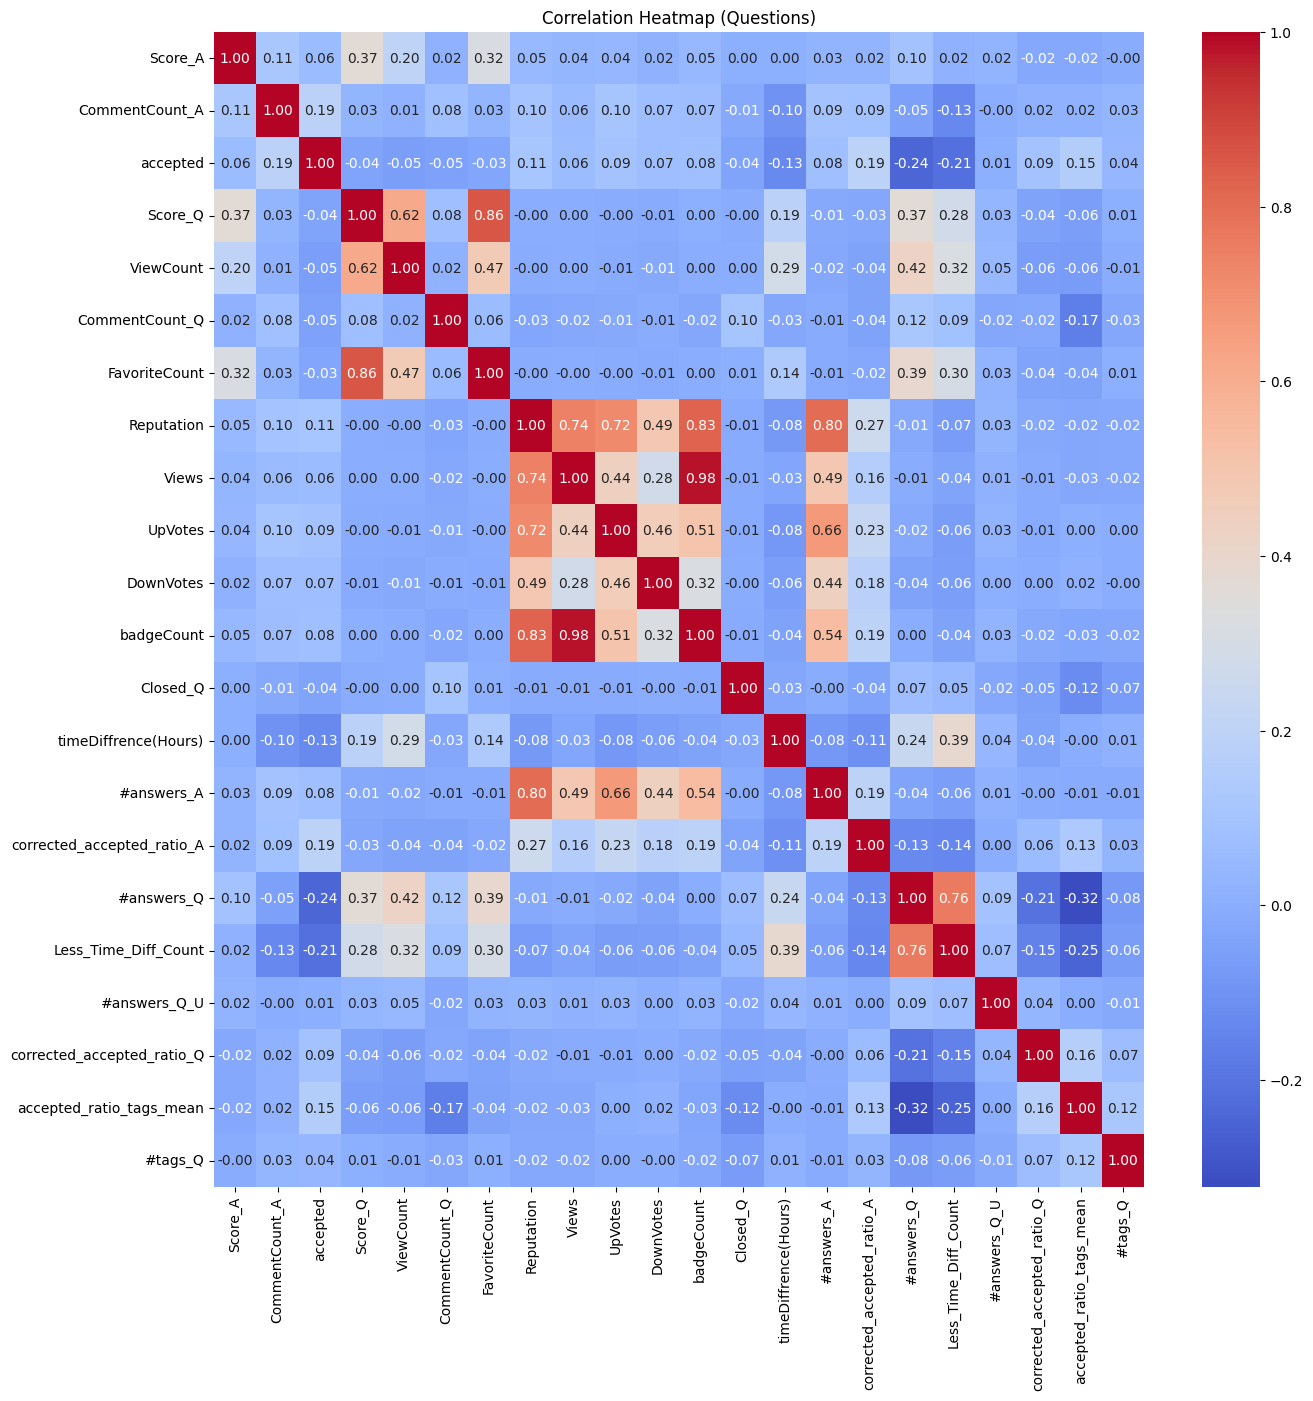

In [149]:

# Calculate correlation matrix
correlation_matrix = merged_A_Q_U_B2_R6.corr()

fig = plt.figure(figsize=(15,15))

fig.patch.set_facecolor('None')
#fig.patch.set_alpha(0.7)

heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap (Questions)')

# Set the background of the plot to be transparent
heatmap.patch.set_facecolor('none')
heatmap.patch.set_alpha(0.1)
plt.show()

# Create dataset splits

In [202]:
features = merged_A_Q_U_B2_R6.drop(["accepted"], axis=1)
labels = merged_A_Q_U_B2_R6["accepted"]

In [203]:
train_X, val_X, train_y, val_y = train_test_split(features, labels, test_size=0.2, random_state=42)

In [204]:
train_X.columns

Index(['Score_A', 'CommentCount_A', 'Score_Q', 'ViewCount', 'CommentCount_Q',
       'FavoriteCount', 'Reputation', 'Views', 'UpVotes', 'DownVotes',
       'badgeCount', 'Closed_Q', 'timeDiffrence(Hours)',
       'corrected_accepted_ratio_A', '#answers_Q', 'Less_Time_Diff_Count',
       'corrected_accepted_ratio_Q', 'accepted_ratio_tags_mean', '#tags_Q'],
      dtype='object')

# Model (XGBOOST)

In [205]:
# Define the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    tree_method='hist',
    use_label_encoder=False,
    nthread=-1,
    seed=42,
)


# Training

In [206]:
# Train the XGBoost classifier
xgb_classifier.fit(train_X, train_y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, nthread=-1, num_parallel_tree=None, ...)

# Evalutation

In [207]:
# Make predictions on the validation set
val_predictions = xgb_classifier.predict(val_X)

# Evaluate the performance on the validation set
accuracy = metrics.accuracy_score(val_y, val_predictions)
print(f'Accuracy on the validation set: {accuracy:.2f}')


accuracy = metrics.f1_score(val_y, val_predictions)
print(f'F1 on the validation set: {accuracy:.2f}')

accuracy = metrics.precision_score(val_y, val_predictions)
print(f'Precision on the validation set: {accuracy:.2f}')

accuracy = metrics.recall_score(val_y, val_predictions)
print(f'Recall on the validation set: {accuracy:.2f}')

# Print classification report for more detailed evaluation
print('\nClassification Report:\n', metrics.classification_report(val_y, val_predictions))

Accuracy on the validation set: 0.82
F1 on the validation set: 0.69
Precision on the validation set: 0.75
Recall on the validation set: 0.63

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.91      0.88    203789
           1       0.75      0.63      0.69     89031

    accuracy                           0.82    292820
   macro avg       0.80      0.77      0.78    292820
weighted avg       0.82      0.82      0.82    292820



# Feature importance

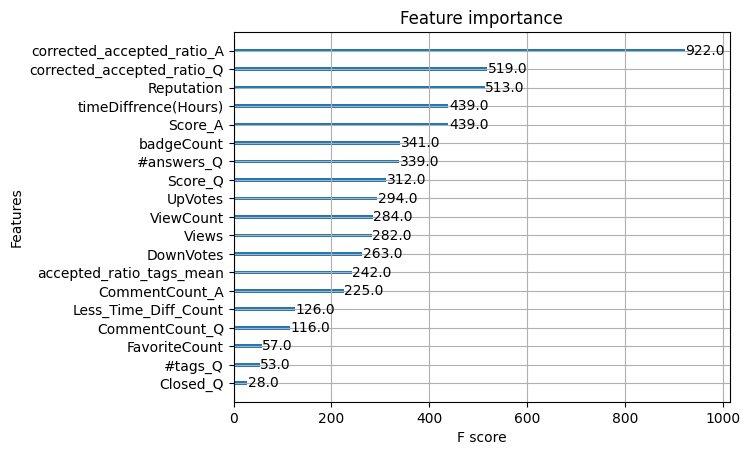

In [208]:
import matplotlib.pyplot as plt

xgb.plot_importance(xgb_classifier)
plt.show()